# 1. Load Dataset

In [3]:
import numpy as np
import pandas as pd

# Load dataset into dataframe
print("*********** Dataset #3 (1951 - Present) ***********\n")
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/data/idb5yr.all', delimiter='|', encoding='ISO-8859-1')
print("--> Columns:", df.columns.values)

*********** Dataset #3 (1951 - Present) ***********

--> Columns: ['#YR' 'TFR' 'SRB' 'RNI' 'POP95_99' 'POP90_94' 'POP85_89' 'POP80_84'
 'POP75_79' 'POP70_74' 'POP65_69' 'POP60_64' 'POP5_9' 'POP55_59'
 'POP50_54' 'POP45_49' 'POP40_44' 'POP35_39' 'POP30_34' 'POP25_29'
 'POP20_24' 'POP15_19' 'POP10_14' 'POP100_' 'POP0_4' 'POP' 'NMR' 'NAME'
 'MR1_4' 'MR0_4' 'MPOP95_99' 'MPOP90_94' 'MPOP85_89' 'MPOP80_84'
 'MPOP75_79' 'MPOP70_74' 'MPOP65_69' 'MPOP60_64' 'MPOP5_9' 'MPOP55_59'
 'MPOP50_54' 'MPOP45_49' 'MPOP40_44' 'MPOP35_39' 'MPOP30_34' 'MPOP25_29'
 'MPOP20_24' 'MPOP15_19' 'MPOP10_14' 'MPOP100_' 'MPOP0_4' 'MPOP' 'MMR1_4'
 'MMR0_4' 'IMR_M' 'IMR_F' 'IMR' 'GRR' 'GR' 'FPOP95_99' 'FPOP90_94'
 'FPOP85_89' 'FPOP80_84' 'FPOP75_79' 'FPOP70_74' 'FPOP65_69' 'FPOP60_64'
 'FPOP5_9' 'FPOP55_59' 'FPOP50_54' 'FPOP45_49' 'FPOP40_44' 'FPOP35_39'
 'FPOP30_34' 'FPOP25_29' 'FPOP20_24' 'FPOP15_19' 'FPOP10_14' 'FPOP100_'
 'FPOP0_4' 'FPOP' 'FMR1_4' 'FMR0_4' 'GENC' 'FIPS' 'E0_M' 'E0_F' 'E0' 'CDR'
 'CBR' 'ASFR45_49' '

# 2. Clean Dataset

In [5]:
# Make year column easier to understand
df.rename(columns={'#YR':'YEAR'}, inplace=True)

# Remove every column except for year & population
for col in df.columns.values:
    if col != 'YEAR' and col != 'POP':
        df.drop(col, axis=1, inplace=True)

# Group by year & get sum
df_yr = df.groupby(by='YEAR')
df_yr = df_yr['POP'].sum()

# Create a new dataframe with new data
pop_sum = []
for i in range(1951, 2023):
    pop_sum.append(df_yr[i])
df_pop = pd.DataFrame({'YEAR': list(range(1951, 2023)), 'POP': pop_sum})

print("--> Current:", df_pop['POP'][71], "\n")
df_pop.tail(5)

--> Current: 7905336896 



,YEAR,POP
67,2018,7597066210
68,2019,7676686052
69,2020,7756873419
70,2021,7831718605
71,2022,7905336896


(1951.0, 2122.0)

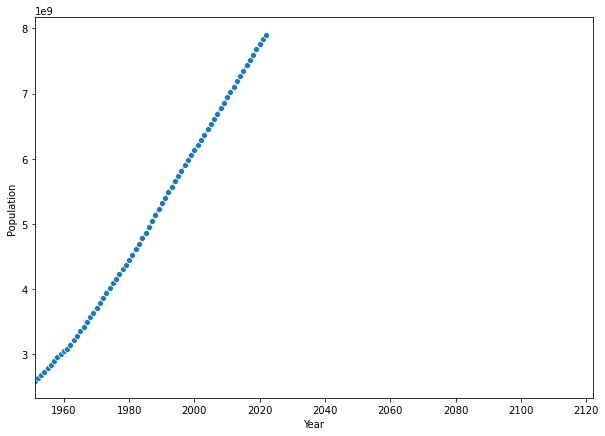

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10,7))
ax = sns.lineplot(data=df_pop, x='YEAR', y='POP', marker='o', dashes=False)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
plt.xlim(1951, 2122)